C:\Users\awotoroe\AppData\Local\Temp\ipykernel_11768\3779584251.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  K[i, j] = kernel(X[i], X[j], length_scale)
C:\Users\awotoroe\AppData\Local\Temp\ipykernel_11768\3779584251.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  K_s[i, j] = kernel(X_pred[i], X[j], length_scale)


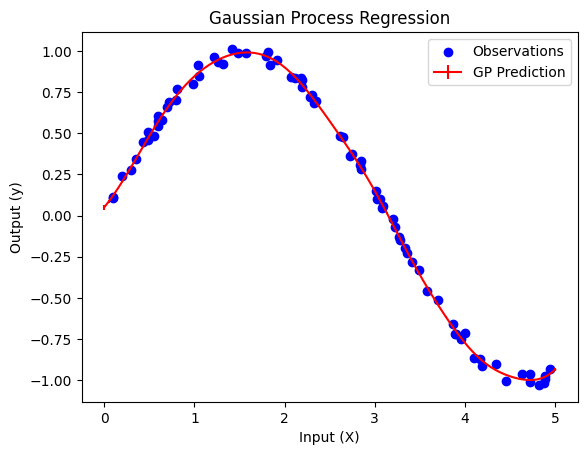

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate random data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y += 0.1 * (0.5 - np.random.rand(80))

# Step 2: Define the Gaussian Process Kernel (RBF Kernel)
def rbf_kernel(x1, x2, length_scale=1.0):
    diff = x1 - x2
    return np.exp(-0.5 * (diff / length_scale)**2)

# Step 3: Perform GP Regression
def gp_regression(X, y, X_pred, kernel, length_scale=1.0, noise=1e-3):
    n = X.shape[0]
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K[i, j] = kernel(X[i], X[j], length_scale)
    
    K_noise = K + noise**2 * np.identity(n)
    
    K_s = np.zeros((X_pred.shape[0], n))  # Transposed for proper shape
    for i in range(X_pred.shape[0]):
        for j in range(n):
            K_s[i, j] = kernel(X_pred[i], X[j], length_scale)
    
    K_s_noise = K_s @ np.linalg.inv(K_noise)
    
    # Compute the predictive mean
    y_pred_mean = K_s_noise @ y
    
    # Compute the predictive variance
    y_pred_variance = np.diag(np.identity(X_pred.shape[0]) - K_s @ np.linalg.inv(K_noise) @ K_s.T)
    
    return y_pred_mean, y_pred_variance

# Step 4: Generate test data points
X_test = np.linspace(0, 5, 100)[:, np.newaxis]

# Step 5: Perform GP regression
y_pred_mean, y_pred_variance = gp_regression(X, y, X_test, rbf_kernel, length_scale=0.5, noise=0.1)

# Plot the results
plt.figure()
plt.errorbar(X_test, y_pred_mean, yerr=y_pred_variance, label='GP Prediction', color='red')
plt.scatter(X, y, color='blue', label='Observations')
plt.xlabel('Input (X)')
plt.ylabel('Output (y)')
plt.title('Gaussian Process Regression')
plt.legend()
plt.show()
